In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
X , y = df.drop(['Outcome'], axis = 1) , df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [4]:
X_train , X_test, y_train , y_test= train_test_split(X,y,test_size = 0.2 , random_state = 5)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled , y_train)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# SideNote on predict , predict_proba , decision_function

this 3 are methods available to the Classifiers (sure of LR and SVC currently) that do seemingly similar things which are however different. They will be explored below

In [34]:
lr_pred_prob = lr.predict_proba(X_test_scaled)
print(lr_pred_prob[:10])
#the model.predict_proba returns the probabilies of that particular test instance falling into either classes (i.e either 0 or 1)
#it returns an array of probabilities for the 2 classes defined in the problem statememnt
#needless to say the probabilities for each array add up to 1 as shown below
[(i[0] + i[1]) for i in lr_pred_prob[:10]]

[[0.84442005 0.15557995]
 [0.63130537 0.36869463]
 [0.90827389 0.09172611]
 [0.86364232 0.13635768]
 [0.93356885 0.06643115]
 [0.87592784 0.12407216]
 [0.50257656 0.49742344]
 [0.25321858 0.74678142]
 [0.35654779 0.64345221]
 [0.57316518 0.42683482]]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [35]:
lr_pred = lr.predict(X_test_scaled)
print(lr_pred[:10])
#model.predict returns a CLASSIFICATION according to some threshold (usually 0.5).
#as shown below

[0 0 0 0 0 0 0 1 1 0]


In [36]:
lr_pred_df = lr.decision_function(X_test_scaled)
svc_pred_df = svc.decision_function(X_test_scaled)
print(lr_pred_df[:10])
#model.decision_function returns an array wherein each element essentially contains 2 pieces of information
#1) the direction of the predictions class (i.e. + for test_data classed as 1 and -ve for data classed as 0)
#i.e. compare the signs of the first 5 elements in the array to the predicted classes in lr_pred above 
#2) the distance of the data points from the hyperplane i.e. the hyperplane is the demarcation plane defined by 
# d(x) = B0 + B1(x1) + ... + B(n)x(n) = 0 in the logistic function
# when drafting the roc curve, it is advised to use the decision_function compared to predict or predict_proba
#still need to undeestand WHY this is so

[-1.69149035 -0.53782093 -2.29273888 -1.84587726 -2.64284865 -1.95442035
 -0.01030633  1.08151944  0.59037948 -0.29477684]


# roc_curve and auc

In [37]:
from sklearn.metrics import roc_curve , auc
from matplotlib import pyplot as plt
#remember roc_curve and auc are both metrics so there are in sklearn.metrics
#roc_curve(takes in the true values , the predicted values (from decision_function))
#and returns a tuple consisting of the false positive rate (x) , true positive rate (y) and threshold
#what roc_curve is essentially doing under the hood is setting a threshold , classifiying against that threshold , recording 
#true positives , false negatives , true negatives and flase positives and calculating the fpr and tpr and return those 
#3 in array of (x,y,thresh) i.e. fpr , tpr , thresh
lr_fpr , lr_tpr, lr_thresh = roc_curve(y_test , lr_pred_df)
lr_auc = auc(lr_fpr,lr_tpr)
svc_fpr , svc_tpr , svc_thresh = roc_curve(y_test , svc_pred_df )
svc_auc = auc(svc_fpr , svc_tpr)

Area Under Curve for LR: 0.8598148148148148
Area Under Curve for SVC: 0.8674074074074074


Text(0,0.5,'True Positive Rate')

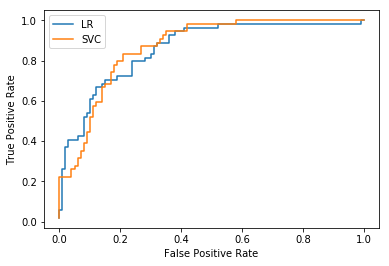

In [40]:
print('Area Under Curve for LR: {}'.format(lr_auc))
print('Area Under Curve for SVC: {}'.format(svc_auc))
plt.plot(lr_fpr , lr_tpr)
plt.plot(svc_fpr , svc_tpr)
plt.legend(['LR' , 'SVC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')